In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, LeakyReLU

In [ ]:
import zipfile
import os

with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/')

In [ ]:

train_path = '/content/dataset/train/train'
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range = 4,
                                   width_shift_range=0.15,
                                   height_shift_range = 0.2,
                                   shear_range=0.3,
                                   fill_mode='nearest',
                                   validation_split=0.25)
train_set = train_datagen.flow_from_directory(directory=train_path, class_mode='categorical',
                                                    color_mode = 'grayscale',
                                                    target_size=(64,64), batch_size=128, shuffle=True,
                                                    subset ="training")
validation_set = train_datagen.flow_from_directory(directory=train_path,
                                                 target_size = (64,64),
                                                 batch_size = 64,
                                                 class_mode = 'categorical',
                                                 color_mode = 'grayscale',subset="validation",shuffle=True)

Found 4050 images belonging to 6 classes.
Found 1350 images belonging to 6 classes.


In [ ]:
# Define the CNN model
model = Sequential()

# Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

# Layer 5
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))


# Layer 6
model.add(Conv2D(1024, (3,3), padding='same'))
model.add(Activation('relu'))


# Layer 7
model.add(Conv2D(2048, (3,3), padding='same'))
model.add(Activation('relu'))



# Layer 8
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(train_set.num_classes)) # Output layer with number of classes
model.add(Activation('softmax')) # Softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 1024)          │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 8, 8, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 2048)          │      18,876,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 8, 8, 2048)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      33,554,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 58,720,262 (224.00 MB)

 Trainable params: 58,720,262 (224.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
h = model.fit(
    train_set,
    validation_data=validation_set,
    epochs=20,
    steps_per_epoch=64,
    validation_steps=48,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='auto'),
        keras.callbacks.ModelCheckpoint(
            'explo/model_{val_loss:.3f}.keras',  # Changed file extension to .keras
            save_best_only=True,
            save_weights_only=False,  # Saving the entire model
            monitor='val_loss'
        )
    ]
)
model.save('model.h5')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/64 ━━━━━━━━━━━━━━━━━━━━ 18:46 35s/step - accuracy: 0.1873 - loss: 2.2722

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1218s 19s/step - accuracy: 0.2128 - loss: 2.0854 - val_accuracy: 0.2800 - val_loss: 1.5168
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1229s 19s/step - accuracy: 0.6005 - loss: 0.9290 - val_accuracy: 0.8333 - val_loss: 0.3282
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1223s 19s/step - accuracy: 0.8687 - loss: 0.2791 - val_accuracy: 0.9533 - val_loss: 0.1094
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1232s 19s/step - accuracy: 0.9699 - loss: 0.0867 - val_accuracy: 0.9978 - val_loss: 0.0073
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1267s 19s/step - accuracy: 0.9943 - loss: 0.0207 - val_accuracy: 0.9985 - val_loss: 0.0082
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1266s 19s/step - accuracy: 0.9964 - loss: 0.0137 - val_accuracy: 0.9993 - val_loss: 0.0018
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1199s 18s/step - accuracy: 0.9982 - loss: 0.0059 - val_accuracy: 0.9970 - val_loss: 0.0163
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1233s 19s/step - accuracy: 0.9983 - loss: 0.0070 - val_accuracy: 1.000

In [ ]:
## Loading the saved model
from keras.models import load_model
model = load_model('model.h5')

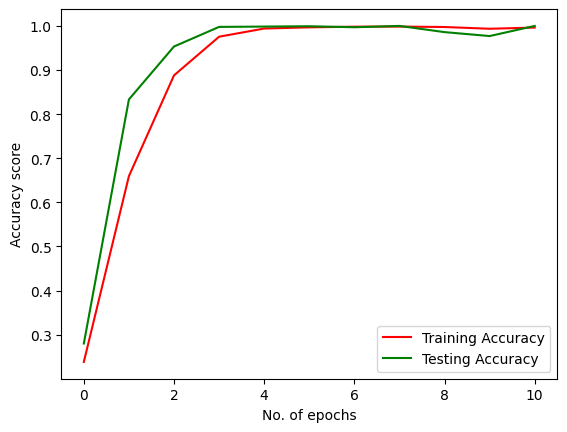

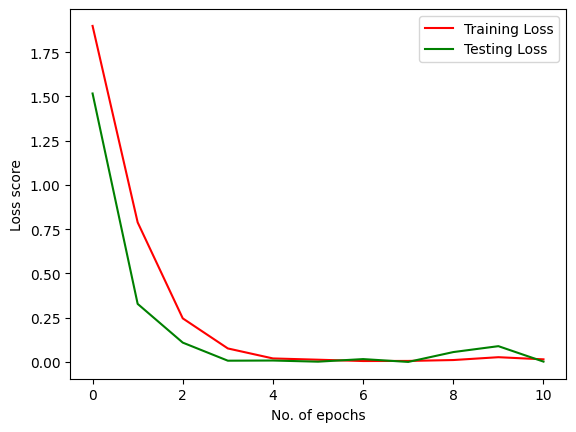

In [ ]:
%matplotlib inline
accu= h.history['accuracy']
val_acc=h.history['val_accuracy']
loss=h.history['loss']
val_loss=h.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy score')
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.xlabel('No. of epochs')
plt.ylabel('Loss score')
plt.legend()
plt.show()

In [ ]:
avg_accuracy = np.mean(h.history['accuracy'])
print(f"Average Accuracy: {avg_accuracy:.4f}")

avg_val_accuracy = np.mean(h.history['val_accuracy'])
print(f"Average Validation Accuracy: {avg_val_accuracy:.4f}")

: 

In [ ]:
train_set.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}